In [464]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [465]:
img = cv2.imread('data/sunset.jpg')
img = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
# для автоматизації вважаю найяскравіший піксель білим 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x, y = np.where(img_gray == np.amax(img_gray))
row = x[0] # бо може бути кілька пікселів з максимальною яскравістю
col = y[0]
print(row,col)

357 407


(<Axes: >, <matplotlib.image.AxesImage at 0x7fe77c6850d0>)

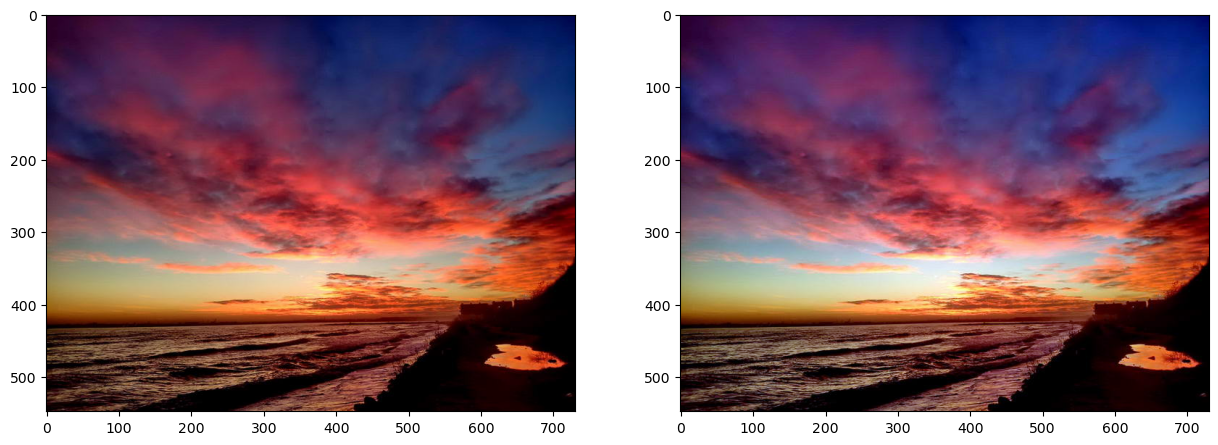

In [466]:
#row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[...,channel]
balanced = balanced/255
balanced[balanced > 1] = 1    
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)


In [467]:
img_g = img
mean_r = np.average(img_g[:,:,0])
print(mean_r)
mean_g = np.average(img_g[:,:,1])
print(mean_g)
mean_b = np.average(img_g[:,:,2])
print(mean_b)
mean_array = [mean_r,mean_g,mean_b]
mean_max = np.max(mean_array)

105.38123187681232
60.91586591340866
70.16647335266474


[1.         1.7299472  1.50187443]


(<Axes: >, <matplotlib.image.AxesImage at 0x7fe77b47c750>)

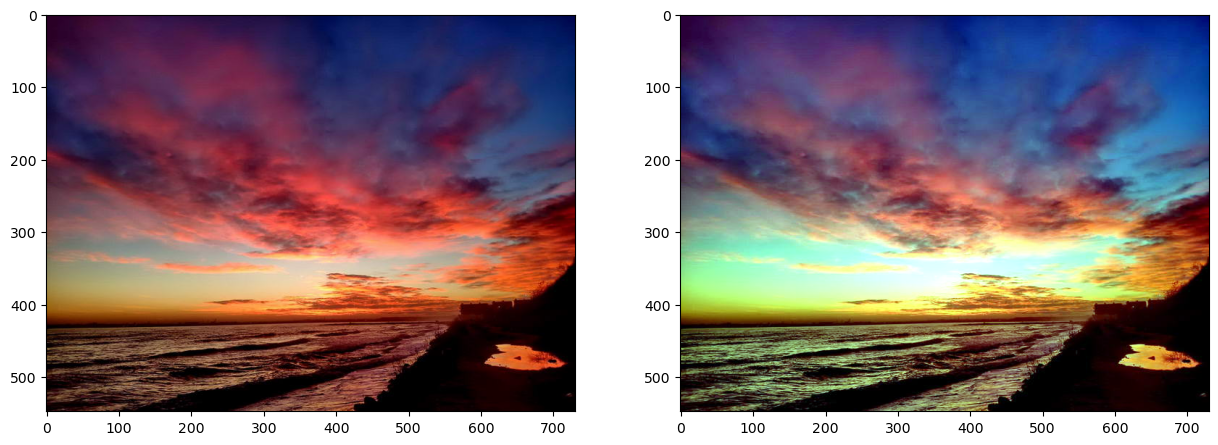

In [468]:
coeffs=mean_max/mean_array
print(coeffs)
balanced_g = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_g[..., channel] = img_g[..., channel] * coeffs[channel]
balanced_g = balanced_g/255
balanced_g[balanced_g > 1] = 1  
plt.subplot(121), plt.imshow(img_g)
plt.subplot(122), plt.imshow(balanced_g)

[1.         1.02409639 1.30102041]


(<Axes: >, <matplotlib.image.AxesImage at 0x7fe77b3ba450>)

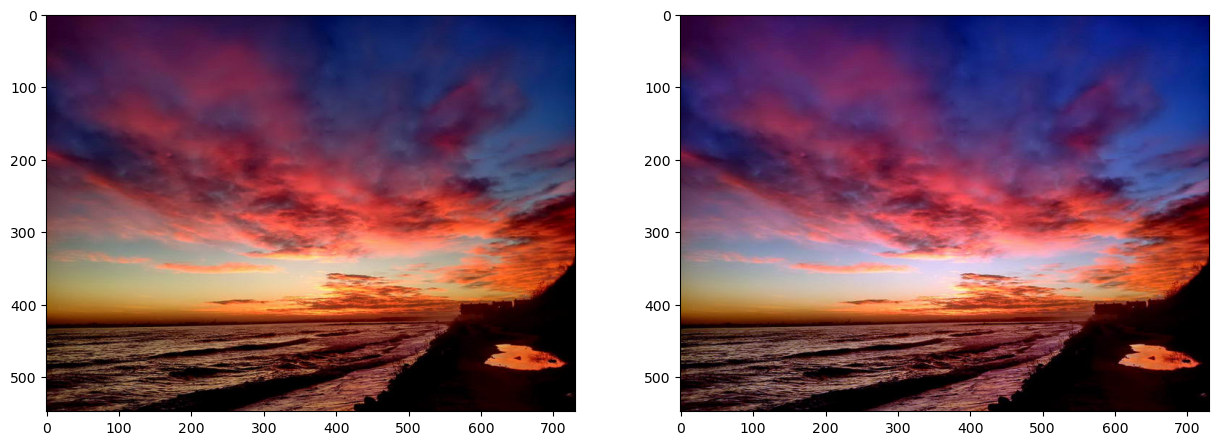

In [469]:
img_m = img
max_r = np.max(img_m[:,:,0])
max_g = np.max(img_m[:,:,1])
max_b = np.max(img_m[:,:,2])
max_array = [max_r,max_g,max_b]
max_abs = np.max(max_array)
#kr = max_abs/max_r
#kg = max_abs/max_g
#kb = max_abs/max_b
#print(max_r, max_g, max_b)
#print(max_abs)
#print(kr,kg,kb)
coeffs = max_abs/max_array
print(coeffs)
balanced_m = np.zeros_like(img_m, dtype=np.float32)
for channel in range(3):
    balanced_m[..., channel] = img_m[..., channel] * coeffs[channel]
balanced_m = balanced_m/255
balanced_m[balanced_m > 1] = 1      
plt.subplot(121), plt.imshow(img_m)
plt.subplot(122), plt.imshow(balanced_m)

(<Axes: >, <matplotlib.image.AxesImage at 0x7fe77b6450d0>)

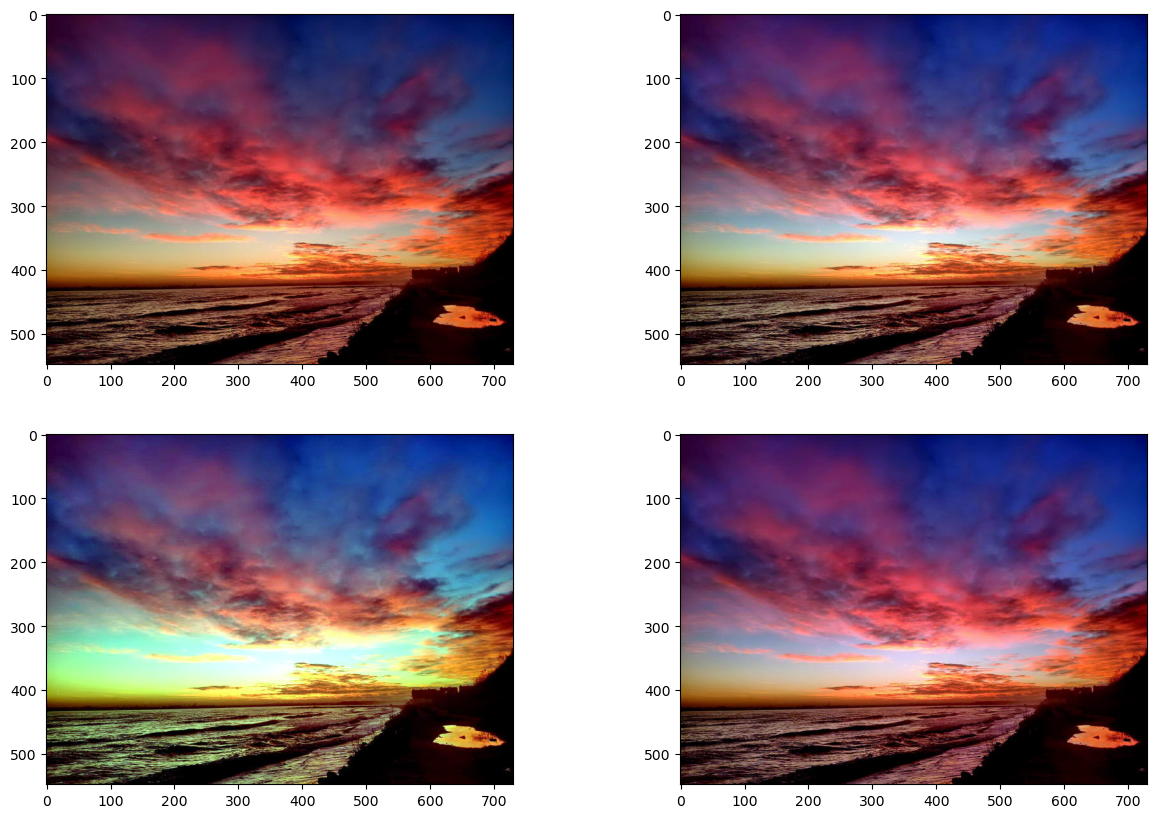

In [456]:
#порівняння
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(balanced)
plt.subplot(223), plt.imshow(balanced_g)
plt.subplot(224), plt.imshow(balanced_m)